## **WiDSxSAP Case Competition 2024**

In [7]:
# Run in terminal if needed:
# pip install pandas matplotlib seaborn scikit-learn
# If using anaconda: conda install pandas matplotlib seaborn scikit-learn

In [8]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Exploratory Data Analysis

In [9]:
# Load datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [10]:
# View the first few rows of the dataset
print(train.head())

   ID  Age  AI_Interaction_Level  Satisfaction_with_AI_Services  \
0   1   59                     2                              7   
1   2   49                     2                              6   
2   3   35                     2                              3   
3   4   63                     2                              3   
4   5   28                     4                              6   

   AI_Personalization_Effectiveness  AI_Response_Time  \
0                                 7                 2   
1                                 5                 1   
2                                 3                 3   
3                                 3                 2   
4                                 6                 1   

   Overall_Usage_Frequency  Customer_Service_Interactions  \
0                       18                              5   
1                        3                              2   
2                        8                              2   
3         

In [11]:
# Check the total & types
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ID                                5000 non-null   int64
 1   Age                               5000 non-null   int64
 2   AI_Interaction_Level              5000 non-null   int64
 3   Satisfaction_with_AI_Services     5000 non-null   int64
 4   AI_Personalization_Effectiveness  5000 non-null   int64
 5   AI_Response_Time                  5000 non-null   int64
 6   Overall_Usage_Frequency           5000 non-null   int64
 7   Customer_Service_Interactions     5000 non-null   int64
 8   Change_in_Usage_Patterns          5000 non-null   int64
 9   Customer_Churn                    5000 non-null   int64
dtypes: int64(10)
memory usage: 390.8 KB
None


We will run summary statistics and clean the data provided.

In [12]:
# Summary statistics for numerical features
print(train.describe())

                ID          Age  AI_Interaction_Level  \
count  5000.000000  5000.000000           5000.000000   
mean   2500.500000    42.575000              2.468800   
std    1443.520003    12.554597              0.940853   
min       1.000000    21.000000              1.000000   
25%    1250.750000    32.000000              2.000000   
50%    2500.500000    43.000000              2.000000   
75%    3750.250000    53.000000              3.000000   
max    5000.000000    64.000000              4.000000   

       Satisfaction_with_AI_Services  AI_Personalization_Effectiveness  \
count                     5000.00000                       5000.000000   
mean                         5.51060                          5.525800   
std                          2.86446                          2.884129   
min                          1.00000                          1.000000   
25%                          3.00000                          3.000000   
50%                          5.00000      

In [13]:
# Count distinct values and mode for categorical features
categorical_features = ['AI_Response_Time', 'Customer_Churn'] 
for feature in categorical_features:
    print(f"\nValue counts for {feature}:")
    print(train[feature].value_counts())


Value counts for AI_Response_Time:
AI_Response_Time
1    1708
2    1676
3    1616
Name: count, dtype: int64

Value counts for Customer_Churn:
Customer_Churn
0    2909
1    2091
Name: count, dtype: int64


In [14]:
# Identify any missing values in the dataset
print(train.isnull().sum())

ID                                  0
Age                                 0
AI_Interaction_Level                0
Satisfaction_with_AI_Services       0
AI_Personalization_Effectiveness    0
AI_Response_Time                    0
Overall_Usage_Frequency             0
Customer_Service_Interactions       0
Change_in_Usage_Patterns            0
Customer_Churn                      0
dtype: int64


The dataset is tidy, **equally distributed** between categories, and has **no null values**.

#### **Univariate Analysis**

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


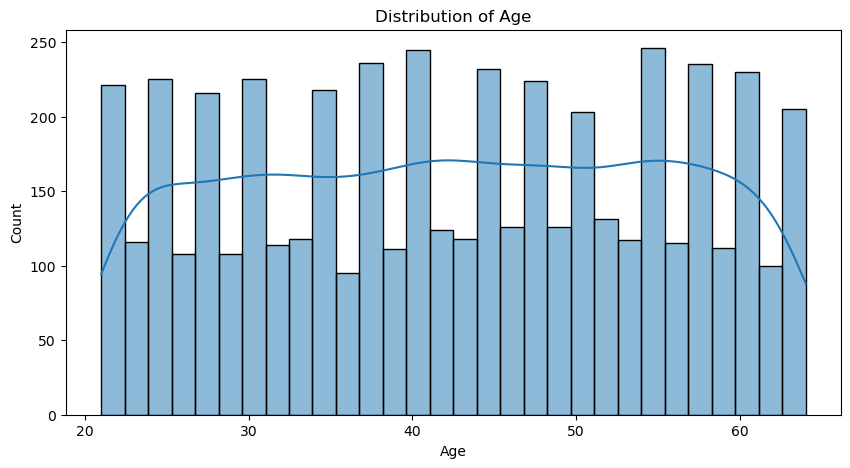

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


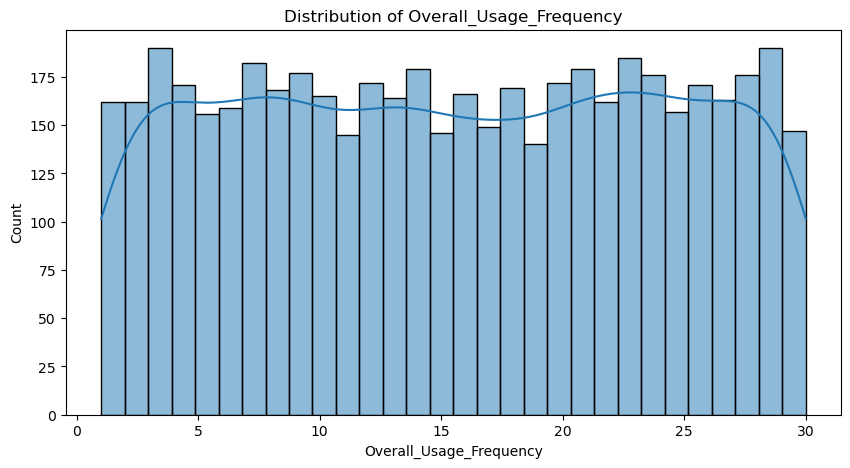

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


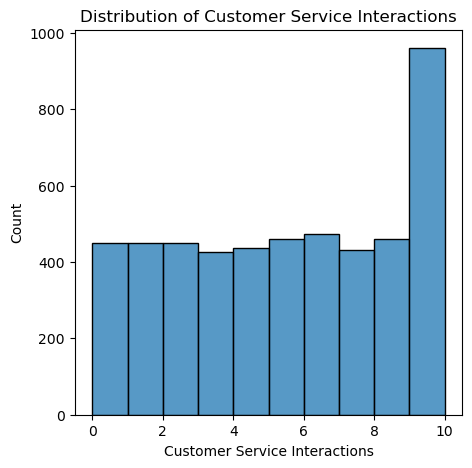

In [15]:
# Visualize the distribution of numerical features
numerical_features = ['Age', 'Overall_Usage_Frequency'] 
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()
    
# Separate histogram for Customer_Service_Interactions
plt.figure(figsize=(5, 5))
sns.histplot(data=train, x='Customer_Service_Interactions', binwidth=1)
plt.title('Distribution of Customer Service Interactions')
plt.xlabel('Customer Service Interactions')
plt.ylabel('Count')
plt.show()

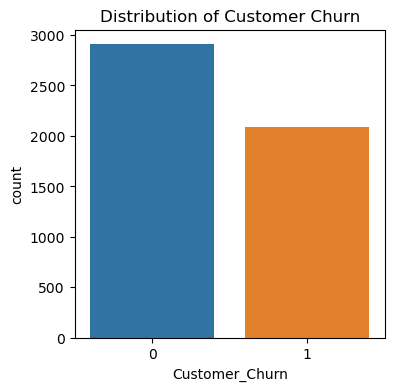

In [16]:
# Target variable
plt.figure(figsize=(4,4))
sns.countplot(x='Customer_Churn', data=train)
plt.title('Distribution of Customer Churn')
plt.show()

The data across different variables, both categorical and numerical, are distributed pretty evenly. However, as the target variable has more samples of positive customer churn, we will need to upsample our data during training.

#### **Correlation Analysis**

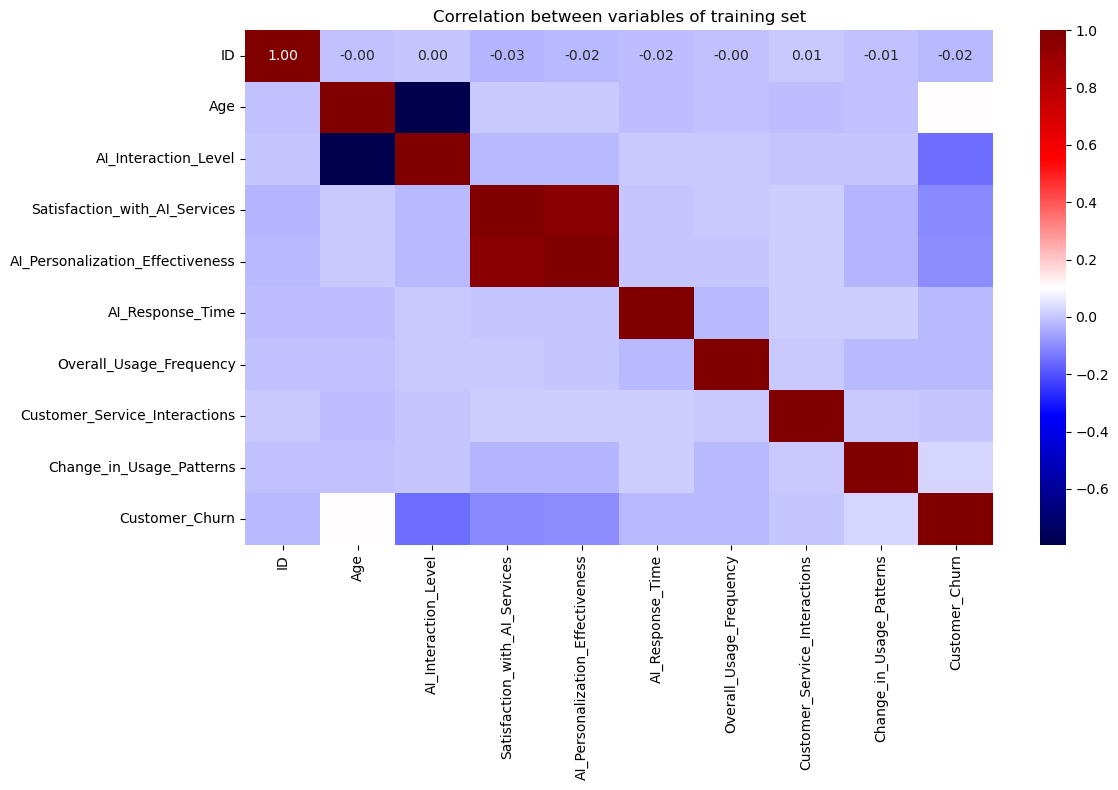

In [35]:
# Plotting correlation matrix
correlation_matrix = train.corr()

plt.figure(figsize=(12, 8))

# Drawing heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='seismic',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)
plt.title("Correlation between variables of training set")

plt.tight_layout()
plt.show()

* AI interaction levels have a weak negative correlation (about 0.2) to customer churn.
* Similarly, weak negative relationships can be observed related to Satisfaction with AI services and AI Personalization Effectiveness. 
* Conversely, Age has a weak but noticable positive correlation to customer churn.

#### **Analysing Bivariate Feature Relationships**

We use box plots / scatter plots to visualize our **continuous** variables.

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


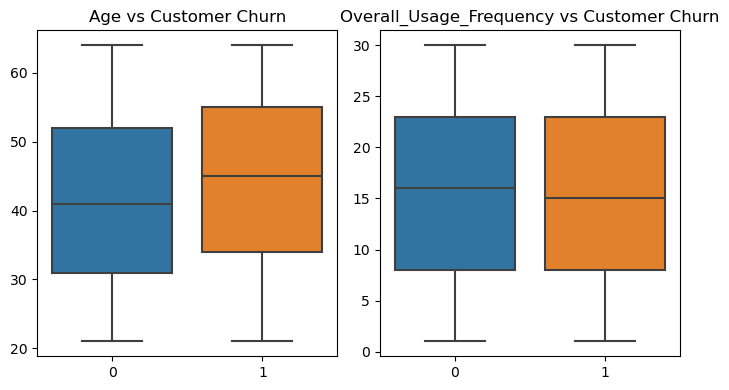

In [31]:
# List of continuous variables
continuous_vars = ['Age', 'Overall_Usage_Frequency']

fig, axes = plt.subplots(1, len(continuous_vars), figsize=(7, 4)) 

# Iterate through the variables and create a box plot for each
for ax, column in zip(axes, continuous_vars):
    sns.boxplot(ax=ax, x='Customer_Churn', y=column, data=train)
    ax.set_title(f'{column} vs Customer Churn')
    ax.set_xlabel('')  
    ax.set_ylabel('')  

plt.tight_layout()

# Show the plot
plt.show()

We use stacked bar charts to visualize our **categorical** features.

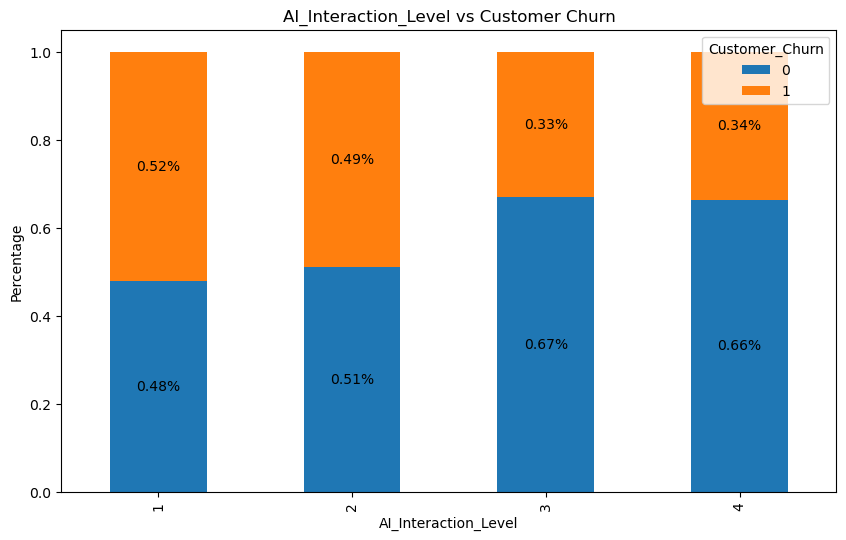

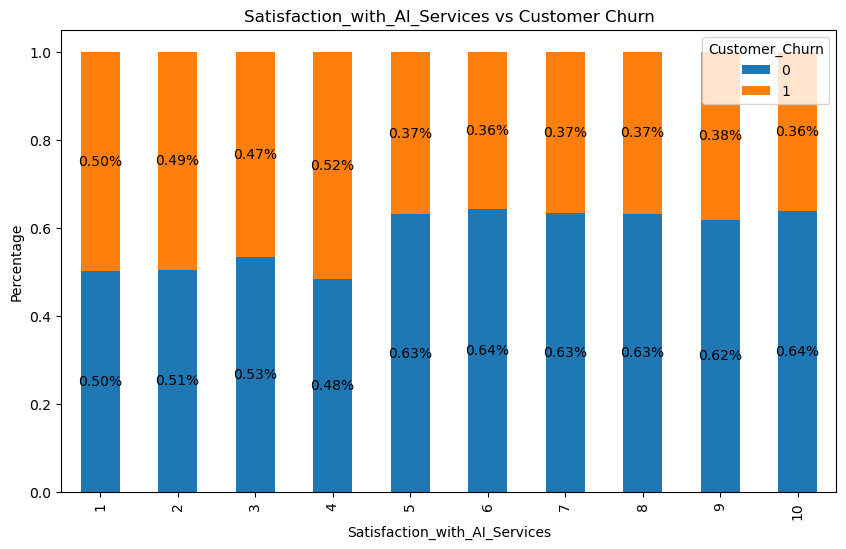

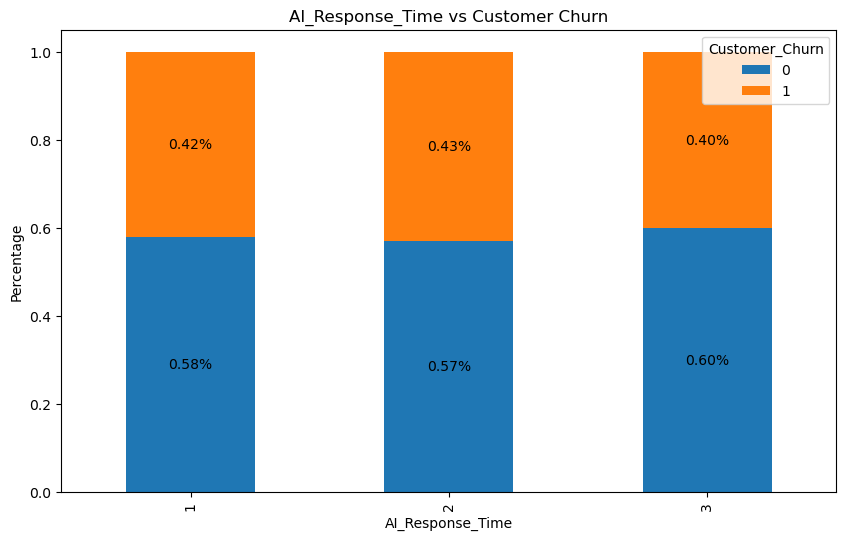

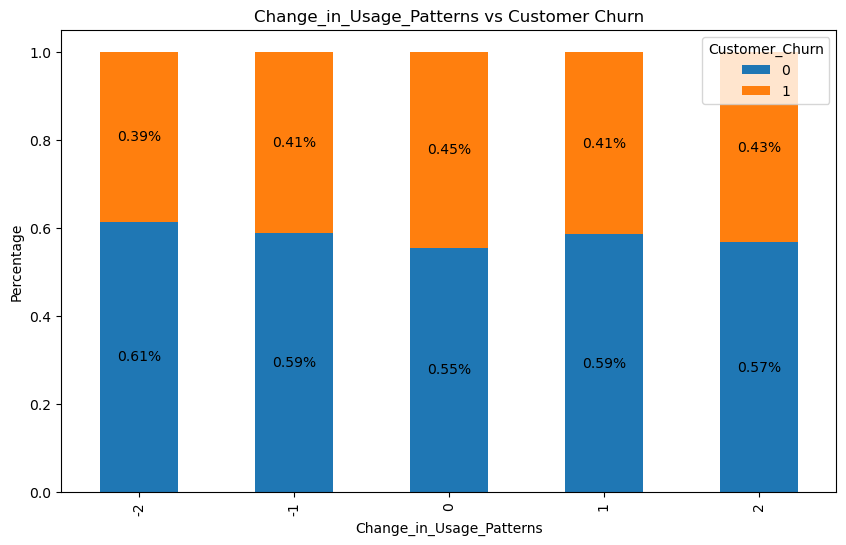

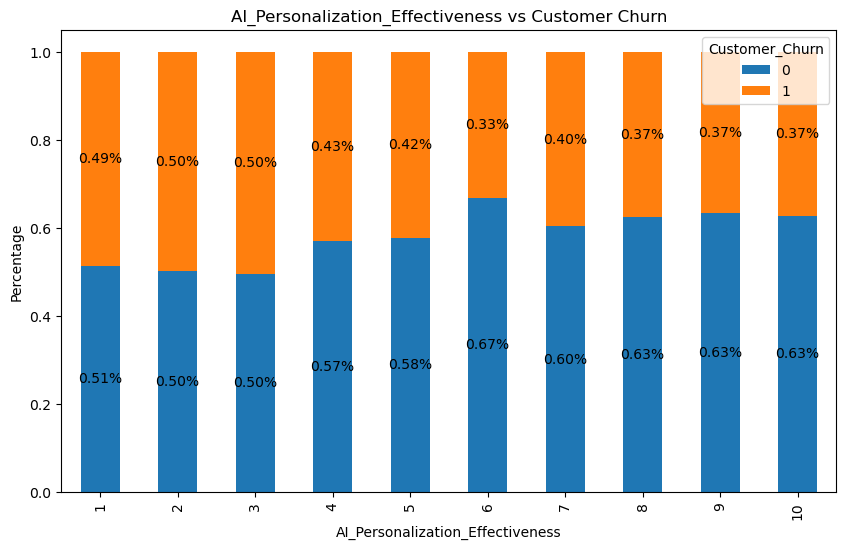

In [22]:
# Convert the 'Customer_Churn' back to a categorical type for visualization
train['Customer_Churn'] = train['Customer_Churn'].astype('category')

# List of categorical variables
categorical_vars = ['AI_Interaction_Level', 'Satisfaction_with_AI_Services', 'AI_Response_Time', 'Change_in_Usage_Patterns', 'AI_Personalization_Effectiveness']

# Iterate through the list and create a stacked bar chart 
for var in categorical_vars:
    cross_tab = pd.crosstab(index=train[var], columns=train['Customer_Churn'], normalize='index')
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'{var} vs Customer Churn')
    plt.ylabel('Percentage')
    for c in ax.containers:
        ax.bar_label(c, fmt='%.2f%%', label_type='center')
    plt.show()

#### **Feature Engineering**

Based on the above insights, we will create a new feature for predicting churn: 

## **Data Preprocessing**

In [24]:
# Load dependencies
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

We will apply One-Hot Encoding to categorical variables to process them into a form that is better suited for prediction through machine learning algorithms. We create a binary column for each category in the original data variable and assign binary values accordingly (0, 1).

In [27]:
# Initializing OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

train_p = train

# Apply One-Hot Encoding
AI_Response_Time_encoded = onehot_encoder.fit_transform(train[['AI_Response_Time']])

# List of categorical variables (Unsure of which is categorical yet?)
categorical_vars = ['AI_Interaction_Level', 'AI_Response_Time']

# Apply One-Hot Encoding
for var in categorical_vars:
    encoded_data = onehot_encoder.fit_transform(train[[var]])
    encoded_df = pd.DataFrame(encoded_data, 
                              columns=[f"{var}_{int(i)}" for i in range(encoded_data.shape[1])])
    
    # Concatenate the new DataFrame to the original one
    train_p = pd.concat([train_p.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    
    # Drop the original column
    train_p.drop(var, axis=1, inplace=True)

# Other variables are treated as numeric
numeric_vars = ['Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness', 'Overall_Usage_Frequency', 'Customer_Service_Interactions', 'Change_in_Usage_Patterns']
train_p[numeric_vars] = train_p[numeric_vars].apply(pd.to_numeric)

print(train_p.head())

   ID  Age  Satisfaction_with_AI_Services  AI_Personalization_Effectiveness  \
0   1   59                              7                                 7   
1   2   49                              6                                 5   
2   3   35                              3                                 3   
3   4   63                              3                                 3   
4   5   28                              6                                 6   

   Overall_Usage_Frequency  Customer_Service_Interactions  \
0                       18                              5   
1                        3                              2   
2                        8                              2   
3                        6                              6   
4                       11                              3   

   Change_in_Usage_Patterns Customer_Churn  AI_Interaction_Level_0  \
0                         2              1                     0.0   
1                 

#### **Scaling Data**

Since we are looking to try different algorithms for prediction, we will perform standardization and normalization separately on the data to apply to different models accordingly. SVM and Logistic Regression models tend to benefit from standardization, while RNN models benefit more from normalization.

#### **Standardizing the Data**

Result dataframe: train_p_standard

In [28]:
# Initializing the scaler
scaler = StandardScaler()

train_p_standard = train_p

# Apply standardization
train_p_standard['Age'] = scaler.fit_transform(train_p_standard[['Age']])
train_p_standard['Overall_Usage_Frequency'] = scaler.fit_transform(train_p_standard[['Overall_Usage_Frequency']])
train_p_standard['Customer_Service_Interactions'] = scaler.fit_transform(train_p_standard[['Customer_Service_Interactions']])

In [29]:
print(train_p_standard.head())

   ID       Age  Satisfaction_with_AI_Services  \
0   1  1.308417                              7   
1   2  0.511816                              6   
2   3 -0.603425                              3   
3   4  1.627057                              3   
4   5 -1.161045                              6   

   AI_Personalization_Effectiveness  Overall_Usage_Frequency  \
0                                 7                 0.285562   
1                                 5                -1.438151   
2                                 3                -0.863580   
3                                 3                -1.093408   
4                                 6                -0.518837   

   Customer_Service_Interactions  Change_in_Usage_Patterns Customer_Churn  \
0                      -0.020830                         2              1   
1                      -0.964795                         0              0   
2                      -0.964795                         1              1   
3     

#### **Data Normalization**

Result dataframe: train_p_normal

In [30]:
# Initialize the MinMaxScaler for normalization
scaler = MinMaxScaler()

train_p_normal = train_p

columns_to_normalize = ['Age', 'Overall_Usage_Frequency', 'Customer_Service_Interactions']
train_p_normal[columns_to_normalize] = scaler.fit_transform(train_p_normal[columns_to_normalize])

# Display the normalized DataFrame
print(train_p_normal.head())

   ID       Age  Satisfaction_with_AI_Services  \
0   1  0.883721                              7   
1   2  0.651163                              6   
2   3  0.325581                              3   
3   4  0.976744                              3   
4   5  0.162791                              6   

   AI_Personalization_Effectiveness  Overall_Usage_Frequency  \
0                                 7                 0.586207   
1                                 5                 0.068966   
2                                 3                 0.241379   
3                                 3                 0.172414   
4                                 6                 0.344828   

   Customer_Service_Interactions  Change_in_Usage_Patterns Customer_Churn  \
0                            0.5                         2              1   
1                            0.2                         0              0   
2                            0.2                         1              1   
3     

We do not need to conduct train-test splitting; the training and testing data has already been split.

## **Model Selection**

#### **Baseline Model**

We will use **Logistic Regression** as a commonly-implemented model for binary classification to establish baseline performance.

#### **Model Evaluation**